# Relatório parcial da análise dos dados coletados para verificar a incidência de animais em situação de rua nos bairros de Guarapuava

Primeira coleta de respostas:  (15/06/2023 - 21/07/2023)
</br>
Primeiro relatório parcial: 24/07/2023
</br>
Segunda coleta de respostas: 24/07/2023 - 01/12/2023

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import statistics
import seaborn as sns

In [15]:
dados_atuais = 'dadosparciais.csv'

dados = pd.read_csv(dados_atuais)

print("Apresentação das questões do formulário:")
display(list(dados.columns))


Apresentação das questões do formulário:


['Carimbo de data/hora',
 'Bairro:',
 'CEP:',
 'Número de cães em situação de rua:',
 'Número de gatos em situação de rua:',
 'Em quais condições esses animais geralmente estão?',
 'Qual é o padrão de aparência mais comum dos cães de rua que você já observou? Por favor, selecione todas as opções que se aplicam.',
 'Você já viu ou soube de vizinhos que abandonaram animais?',
 'O que você acha da castração?',
 'Você costuma ajudar de alguma forma?',
 'Você pode deixar um comentário (opcional)']

In [16]:
dados = dados.drop_duplicates()


In [17]:
dados.dropna(how='all', inplace=True)

In [18]:
dados.rename(columns={
    'Bairro:': 'Bairro',
    'CEP:': 'CEP',
    'Número de cães em situação de rua:': 'Cães_Rua',
    'Número de gatos em situação de rua:': 'Gatos_Rua',
    'Em quais condições esses animais geralmente estão?': 'condicoes_animais',
    'Qual é o padrão de aparência mais comum dos cães de rua que você já observou? Por favor, selecione todas as opções que se aplicam.': 'padrao_aparencia',
    'Você já viu ou soube de vizinhos que abandonaram animais?': 'abandono',
    'O que você acha da castração?': 'castracao',
    'Você costuma ajudar de alguma forma?': 'ajuda',
    'Você pode deixar um comentário (opcional)': 'comentario'
}, inplace=True)

Bairro
Outro                  7
Santa Cruz             7
Boqueirão              5
Vila Carli             4
São Cristovão          2
Morro Alto             2
Trianon                2
Jardim das Américas    2
Bonsucesso             2
Bairro dos Estados     2
Alto da XV             1
Batel                  1
Vila Planalto          1
Conradinho             1
Feroz II               1
Name: count, dtype: int64

Quantidade de respostas: 40


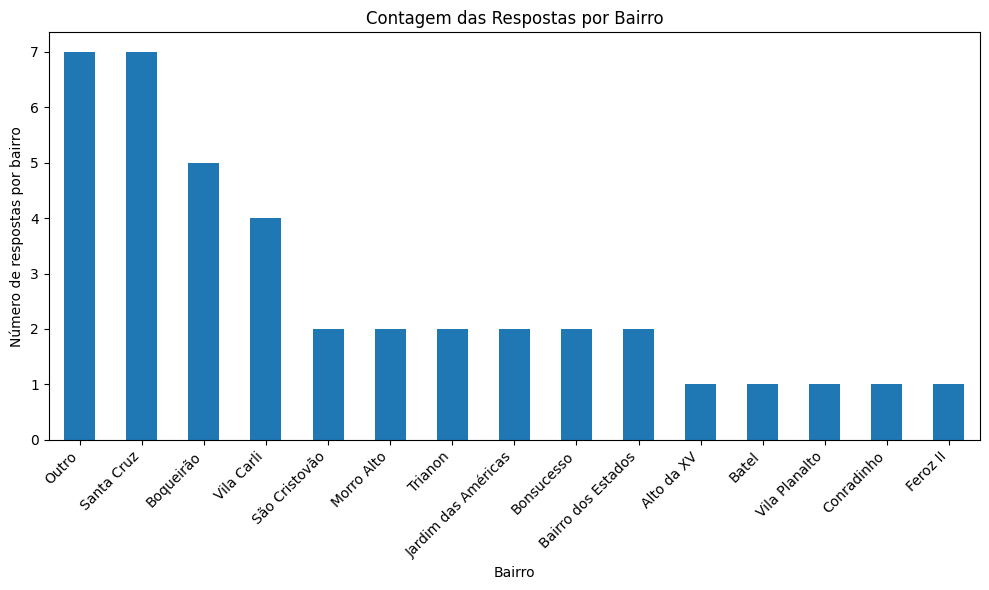

In [19]:

respostas_bairro = dados['Bairro'].value_counts()
total_respostas = respostas_bairro.sum()
print(respostas_bairro)
print()
print('Quantidade de respostas:', total_respostas)

plt.figure(figsize=(10, 6))
respostas_bairro.plot(kind='bar')
plt.title('Contagem das Respostas por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Número de respostas por bairro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
todos_bairros = set(dados['Bairro'].unique())
bairros_sem_resposta = todos_bairros - set(respostas_bairro.index)

print("\nBairros sem nenhuma resposta:")
print(bairros_sem_resposta)


Bairros sem nenhuma resposta:
set()


* Para realizar uma análise quantitativa das respostas às questões "Número de cães em situação de rua" e "Número de gatos em situação de rua", será necessário extrair os números dos textos das respostas, pois os formulários do Google não permitem apenas valores numéricos e as pessoas podem utilizar palavras como "uns" ou "aproximadamente".

Soma dos números de cães em situação de rua: 318
Soma dos números de gatos em situação de rua: 78


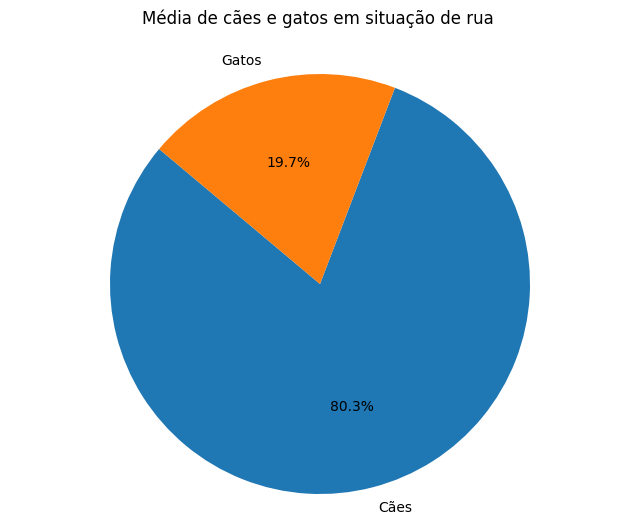

In [21]:
def extrair_numero(texto):
    numeros_encontrados = re.findall(r'\d+', texto)
    return int(numeros_encontrados[0]) if numeros_encontrados else None

dados['Cães_Rua_Int'] = dados['Cães_Rua'].astype(str).apply(extrair_numero)
dados['Gatos_Rua_Int'] = dados['Gatos_Rua'].astype(str).apply(extrair_numero)


soma_caes = dados['Cães_Rua_Int'].sum()
soma_gatos = dados['Gatos_Rua_Int'].sum()

print("Soma dos números de cães em situação de rua:", int(soma_caes))
print("Soma dos números de gatos em situação de rua:", int(soma_gatos))

categorias = ['Cães', 'Gatos']
valores = [soma_caes, soma_gatos]

plt.figure(figsize=(8, 6))
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Média de cães e gatos em situação de rua \n')
plt.axis('equal')  # Faz o gráfico de pizza circular
plt.show()

Bairro: Boqueirão
Soma de cães: 36
Soma de gatos: 5
-------------------------
Bairro: Alto da XV
Soma de cães: 50
Soma de gatos: 20
-------------------------
Bairro: São Cristovão
Soma de cães: 9
Soma de gatos: 0
-------------------------
Bairro: Outro
Soma de cães: 62
Soma de gatos: 5
-------------------------
Bairro: Santa Cruz
Soma de cães: 36
Soma de gatos: 29
-------------------------
Bairro: Vila Carli
Soma de cães: 30
Soma de gatos: 3
-------------------------
Bairro: Morro Alto
Soma de cães: 16
Soma de gatos: 1
-------------------------
Bairro: Trianon
Soma de cães: 11
Soma de gatos: 0
-------------------------
Bairro: Batel
Soma de cães: 0
Soma de gatos: 0
-------------------------
Bairro: Jardim das Américas
Soma de cães: 20
Soma de gatos: 7
-------------------------
Bairro: Bonsucesso
Soma de cães: 6
Soma de gatos: 0
-------------------------
Bairro: Vila Planalto
Soma de cães: 20
Soma de gatos: 8
-------------------------
Bairro: Bairro dos Estados
Soma de cães: 20
Soma de 

<Figure size 1200x600 with 0 Axes>

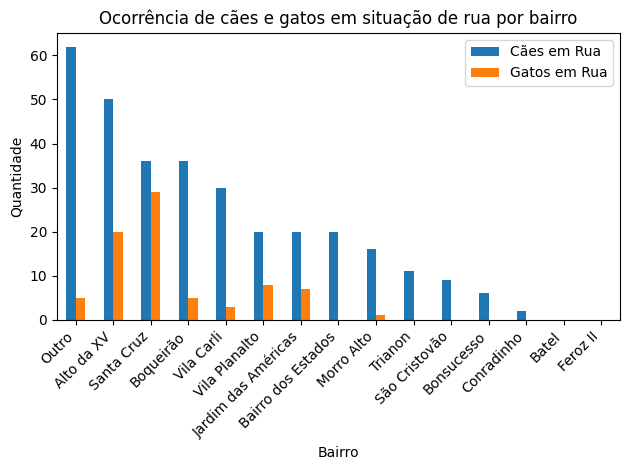

In [22]:
bairros_unicos = dados['Bairro'].unique()

soma_caes_por_bairro = {}
soma_gatos_por_bairro = {}


for bairro in bairros_unicos:
    linha_bairro = dados.loc[dados['Bairro'] == bairro]
    
    soma_caes = linha_bairro['Cães_Rua_Int'].sum()
    soma_gatos = linha_bairro['Gatos_Rua_Int'].sum()
    
    soma_caes_por_bairro[bairro] = soma_caes
    soma_gatos_por_bairro[bairro] = soma_gatos

 
for bairro in bairros_unicos:
    print(f"Bairro: {bairro}")
    print("Soma de cães:", int(soma_caes_por_bairro[bairro]))
    print("Soma de gatos:", int(soma_gatos_por_bairro[bairro]))
    print("-------------------------")


totais_por_bairro = pd.DataFrame({'Cães_Rua': soma_caes_por_bairro, 'Gatos_Rua': soma_gatos_por_bairro})
totais_por_bairro = totais_por_bairro.sort_values(by=['Cães_Rua', 'Gatos_Rua'], ascending=False)


plt.figure(figsize=(12, 6))
totais_por_bairro.plot(kind='bar')
plt.title('Ocorrência de cães e gatos em situação de rua por bairro')
plt.xlabel('Bairro')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(['Cães em Rua', 'Gatos em Rua'])
plt.tight_layout()
plt.show()



Média de cães em situação de rua: 9.9375
Variância de cães em situação de rua: 91.09274193548387
Desvio padrão de cães em situação de rua: 9.544251774522918
Mediana de cães em situação de rua: 8.0
Moda de cães em situação de rua: 10.0


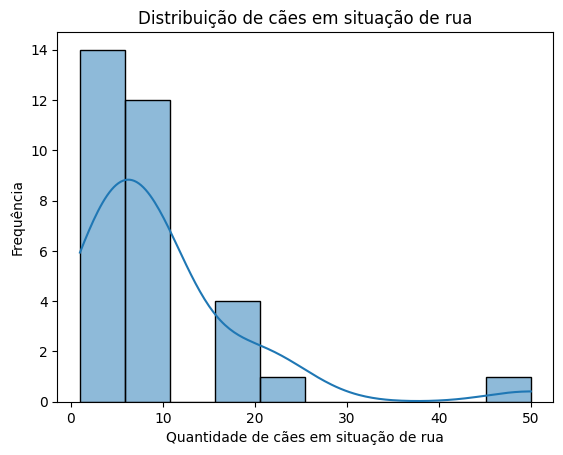

In [23]:
dados = dados[dados['Cães_Rua_Int'] > 0] 

media_caes_rua = dados['Cães_Rua_Int'].mean()
variancia_caes_rua = dados['Cães_Rua_Int'].var()
desvio_padrao_caes_rua = dados['Cães_Rua_Int'].std()

mediana_caes_rua = dados['Cães_Rua_Int'].median()
moda_caes_rua = statistics.mode(dados['Cães_Rua_Int'])

print("Média de cães em situação de rua:", media_caes_rua)
print("Variância de cães em situação de rua:", variancia_caes_rua)
print("Desvio padrão de cães em situação de rua:", desvio_padrao_caes_rua)

print("Mediana de cães em situação de rua:", mediana_caes_rua)
print("Moda de cães em situação de rua:", moda_caes_rua)

sns.histplot(dados['Cães_Rua_Int'], bins=10, kde=True)
plt.xlabel('Quantidade de cães em situação de rua')
plt.ylabel('Frequência')
plt.title('Distribuição de cães em situação de rua')
plt.show()

Média de gatos em situação de rua: 5.571428571428571
Variância de gatos em situação de rua: 23.4945054945055
Desvio padrão de gatos em situação de rua: 4.847113109316256
Mediana de gatos em situação de rua: 4.5
Moda de gatos em situação de rua: 3.0


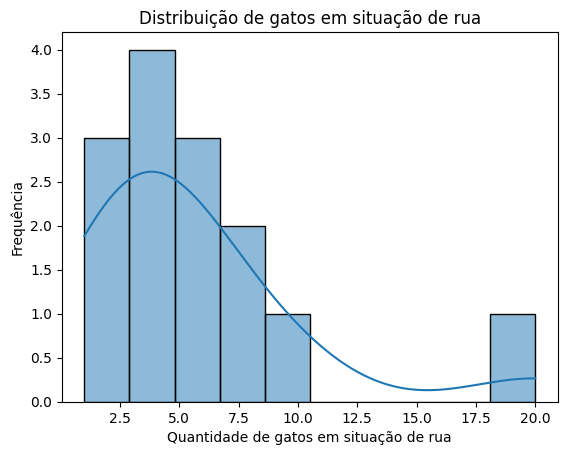

In [24]:
dados = dados[dados['Gatos_Rua_Int'] > 0]

media_gatos_rua = dados['Gatos_Rua_Int'].mean()
variancia_gatos_rua = dados['Gatos_Rua_Int'].var()
desvio_padrao_gatos_rua = dados['Gatos_Rua_Int'].std()

mediana_gatos_rua = dados['Gatos_Rua_Int'].median()
moda_gatos_rua = statistics.mode(dados['Gatos_Rua_Int'])

print("Média de gatos em situação de rua:", media_gatos_rua)
print("Variância de gatos em situação de rua:", variancia_gatos_rua)
print("Desvio padrão de gatos em situação de rua:", desvio_padrao_gatos_rua)

print("Mediana de gatos em situação de rua:", mediana_gatos_rua)
print("Moda de gatos em situação de rua:", moda_gatos_rua)

sns.histplot(dados['Gatos_Rua_Int'], bins=10, kde=True)  
plt.xlabel('Quantidade de gatos em situação de rua')
plt.ylabel('Frequência')
plt.title('Distribuição de gatos em situação de rua')
plt.show()


# Análise dados categóricos

In [25]:

# Criar variáveis dummies para cada opção de resposta de múltipla escolha com os novos nomes
dados_dummies = pd.get_dummies(dados, columns=[
    'condicoes_animais',
    'padrao_aparencia',
    'abandono',
    'castracao',
    'ajuda'
])

# Exibir o DataFrame tratado com as variáveis dummies
print(list(dados_dummies))


['Carimbo de data/hora', 'Bairro', 'CEP', 'Cães_Rua', 'Gatos_Rua', 'comentario', 'Cães_Rua_Int', 'Gatos_Rua_Int', 'condicoes_animais_Com sinais de maus-tratos;Desidratados, fome e sede', 'condicoes_animais_Desidratados, fome e sede;Com parasitas (pulgas, carrapatos, etc.);Em perigo iminente (ex.: próximo a uma rodovia movimentada)', 'condicoes_animais_Desnutridos ou subnutridos', 'condicoes_animais_Desnutridos ou subnutridos;Doentes ou com problemas de saúde;Feridos ou machucados;Com sinais de maus-tratos;Com parasitas (pulgas, carrapatos, etc.);Abandonados com filhotes;Em perigo iminente (ex.: próximo a uma rodovia movimentada)', 'condicoes_animais_Desnutridos ou subnutridos;Doentes ou com problemas de saúde;Feridos ou machucados;Com sinais de maus-tratos;Com parasitas (pulgas, carrapatos, etc.);Em perigo iminente (ex.: próximo a uma rodovia movimentada)', 'condicoes_animais_Desnutridos ou subnutridos;Doentes ou com problemas de saúde;Feridos ou machucados;Com sinais de maus-tratos;De